<div align="center">
<a href="https://vbti.nl"><img src="https://i.ibb.co/t3Pvw97/vbti-logo.png" width="400"></a>
</div>


# Casestudy: Handwritten digit classification with CNN and Keras

This casestudy uses the same template as a homework for the previous ANN masterclass. However, now we are going to use a Convolutional Neural Network to process the image data.

In [1]:
# import some default libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data preparation
In this exercise, you would need to build a neural network for handwritten digit recognition. The well known MNIST dataset consists of 70,000 images of handwritten numbers. The challenge is to train a neural network that labels each image with the correct number. To train the neural network 60,000 images are used. The remaining 10,000 images are used to validate the performance of the neural network.

The dataset is available through Keras Datasets. We download and prepare the data. First, inputs need scaled, since neural networks work better with scaled data between 0 and 1. Second, the labels need to be one-hot encoded.

### Load the data

In [2]:
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# scale data
x_train, x_val = x_train / 255.0, x_val / 255.0

# inspect shape and type
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_val.dtype, y_train.dtype

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 dtype('float64'),
 dtype('uint8'))

Since image shas shape 28x28, we would need to add an additional dimension for channels. Since a Convolution Neural Network always expects an images with three dimensions (height, width, channels).

In [3]:
# here you can either use np.expand_dims() method
x_train = np.expand_dims(x_train, axis=-1)
# or use np.newaxis like the following
x_val = x_val[..., np.newaxis]

### Inspect the data

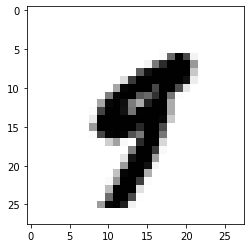

In [5]:
# plot a sample point
plt.imshow(x_train[36000,:,:,0], cmap='binary')

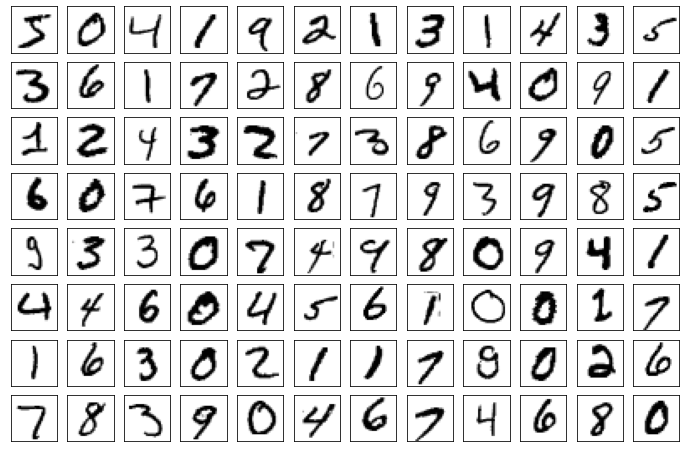

In [6]:
# plot first few numbers
nrows, ncols = 8, 12
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
axs = axs.ravel() 
for i in range(nrows*ncols):
    axs[i].imshow(x_train[i,:,:,0], cmap='binary')
    axs[i].set(xticks=[], yticks=[])

### One-Encode Labels
<div align="center">
<a><img src="https://i.ibb.co/frcCGs8/one-hot.png" width="400"></a>
</div>

In [7]:
# reformat target vector from categorical label to one-hot-encoding
from tensorflow.keras import utils

# reformat labels to one-hot-encoded labels
print('Before y_train[0] = {}'.format(y_train[0]))
y_train_onehot = utils.to_categorical(y_train, 10)
y_val_onehot = utils.to_categorical(y_val, 10)
print('After y_train[0] = {}'.format(y_train_onehot[0]))

Before y_train[0] = 5
After y_train[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Modeling

A neural network can be built in two steps. First, the topology of the neural network is defined. This includes the number of layers, number of nodes (neurons) per layer, and activation function type. Next, a loss function and optimization function need to be defined. Use [Keras](https://keras.io) for programming the neural network.

We are going to build a simple model with Keras Sequential API. 
A neural network can be built in two steps. First, the topology of the neural network is defined. The main building block of the CNN is the convolution layer. Let's have a look at the signature of the Conv2D class. Full documentation is available [here](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Conv2D).

```
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), activation=None,
)

```
There are a lot of ways you can customize the layer. However, we are going to have a look at the most important parameters:
- **filters** - Number of filters to use in the convolution layer. Defines the number of "channels" in the output tensor.
- **kernel_size** - Tuple specifying the width and height of the convolution filter.
- **stride** - The step size at which the kernel moves across the image.
- **activation** - The activation function is applied on the output of the layer.


<div align="center">
<a><img src="https://drive.google.com/uc?id=1RiaJ1yi8GEdQSsu_dXN66mEr0eQEdJz4" width="700"></a>
</div>


You would also need a Pooling layers inbetween the Convolution layers to reduce the computational complexity. There are [multiple types of Pooling](https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/#:~:text=Why%20to%20use%20Pooling%20Layers,generated%20by%20a%20convolution%20layer), but in this case we are going to use the [```MaxPooling2D```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) which is illustrated below:

<div align="center">
<a><img src="https://i.ibb.co/vmvzMMd/6WbWu.png" width="400"></a>
   Illustration of a MaxPooling operations with pool_size=(2, 2) and stride=(2, 2)
</div>

```
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None
)
```
- **pool_size** - Similar to *kernel_size* in CNN layer. Defines the size of the image patch to be pooled together.
- **strides** - Similar to *stride* in CNN layer. Defines the step in pixels at which kernel moves across an image.


Now let's build a network.

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# define model topology
model = models.Sequential(
    [
        layers.Input(shape=x_train.shape[1:]),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

# define model optimization method
model.compile(optimizer=optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Train neural network

In [9]:
# train the model
history = model.fit(x_train, y_train_onehot, epochs=20, batch_size=60, validation_data=(x_val, y_val_onehot))

1000/1000 [==============================] - 15s 4ms/step - loss: 0.2547 - categorical_accuracy: 0.9226 - val_loss: 0.0656 - val_categorical_accuracy: 0.9801


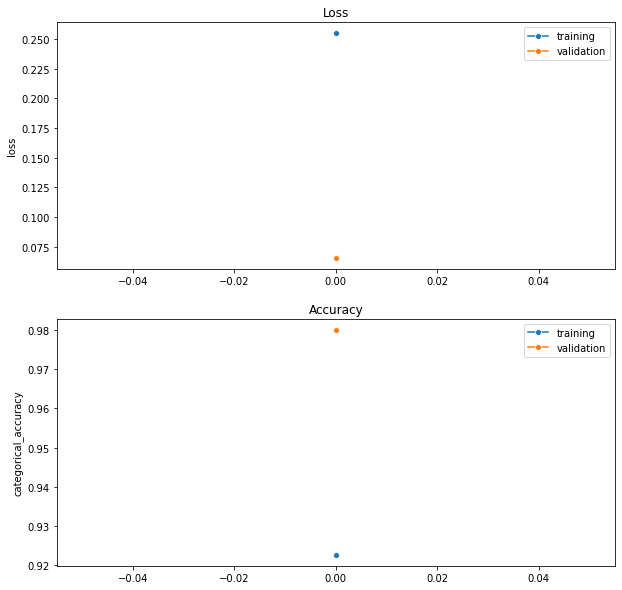

In [10]:
def visualize_training_process(history):
    """ 
    Visualize loss and accuracy from training history
    
    :param history: A Keras History object
    """
    fig, axs = plt.subplots(2, 1, figsize=(10,10))
    axs = axs.ravel() # make 1D array for easy plotting in for loop

    df = pd.DataFrame(history.history)
    
    axs[0].set_title('Loss')    
    sns.lineplot(data=df, x=df.index, y='loss', ax=axs[0], label='training', marker='o')
    sns.lineplot(data=df, x=df.index, y='val_loss', ax=axs[0], label='validation', marker='o')
    
    axs[1].set_title('Accuracy')
    sns.lineplot(data=df, x=df.index, y='categorical_accuracy', ax=axs[1], label='training', marker='o')
    sns.lineplot(data=df, x=df.index, y='val_categorical_accuracy', ax=axs[1], label='validation', marker='o')
    plt.show()
    
visualize_training_process(history)

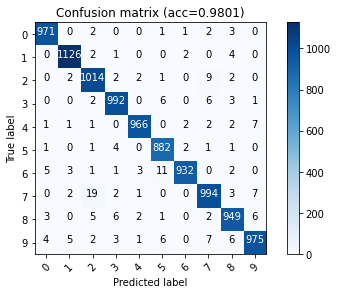

In [11]:
# Evaluate performance of model by plotting confusion matrix
from sklearn.metrics import confusion_matrix

# see http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def accuracy(y, y_pred):
    return np.sum(y==y_pred)/len(y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    

    

# predict labels from validation set
y_pred = model.predict(x_val)

# convert data to label number
y_pred = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_val_onehot, axis=1) 

# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred) 

# plot the confusion matrix
plot_confusion_matrix(cm, 
                      title='Confusion matrix (acc={})'.format(accuracy(y_true, y_pred)), 
                      classes = range(10))

### Questions:
- How does performance of the CNN compares to MLP for the same dataset?
- What is the number of parameters in both cases?